----------------
### **Objective:**
----------------

Build a feed forward neural network model that can identify the digits in the images. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.utils import to_categorical

In [ ]:
print(tf.__version__)

2.7.0


In [ ]:
import h5py

# Open the file as read only
h5f = h5py.File('/content/drive/MyDrive/Neural/SVHN_single_grey1.h5', 'r')

# Load the training and the test set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


# Close this file
h5f.close()

In [ ]:
len(X_train), len(X_test)

(42000, 18000)

**Observations**
- There are 42,000 images in the training data and 18,000 images in the testing data. 

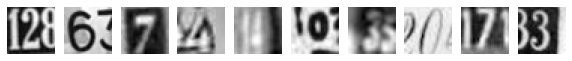

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
plt.figure(figsize=(10, 1))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')

plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

In [ ]:
print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [ ]:
X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)


In [ ]:
# one hot encode output
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Observations**
- Notice that each entry of y_test is a one-hot encoded vector instead of a single label.

In [ ]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
from tensorflow.keras import losses
from tensorflow.keras import optimizers

def nn_model_1():
    model = Sequential() 
    model.add(Dense(64, activation='relu', input_shape=(1024,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    adam = optimizers.Adamax(learning_rate=0.001)
    
    model.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy'])
  
    return model

In [ ]:
model_1 = nn_model_1()

In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                65600     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_model_1 = model_1.fit(X_train,y_train,
            epochs=20,
            batch_size=128,
            validation_split=0.2,
            verbose=1)

Epoch 1/20
263/263 [==============================] - 2s 5ms/step - loss: 2.2902 - accuracy: 0.1198 - val_loss: 2.2585 - val_accuracy: 0.1551
Epoch 2/20
263/263 [==============================] - 2s 7ms/step - loss: 2.2035 - accuracy: 0.1871 - val_loss: 2.1213 - val_accuracy: 0.2381
Epoch 3/20
263/263 [==============================] - 2s 7ms/step - loss: 2.0548 - accuracy: 0.2782 - val_loss: 1.9626 - val_accuracy: 0.3446
Epoch 4/20
263/263 [==============================] - 2s 6ms/step - loss: 1.8874 - accuracy: 0.3633 - val_loss: 1.8091 - val_accuracy: 0.4183
Epoch 5/20
263/263 [==============================] - 1s 4ms/step - loss: 1.7408 - accuracy: 0.4412 - val_loss: 1.6813 - val_accuracy: 0.4702
Epoch 6/20
263/263 [==============================] - 1s 4ms/step - loss: 1.6194 - accuracy: 0.4956 - val_loss: 1.5797 - val_accuracy: 0.5030
Epoch 7/20
263/263 [==============================] - 1s 4ms/step - loss: 1.5296 - accuracy: 0.5280 - val_loss: 1.4948 - val_accuracy: 0.5439
Epoch 

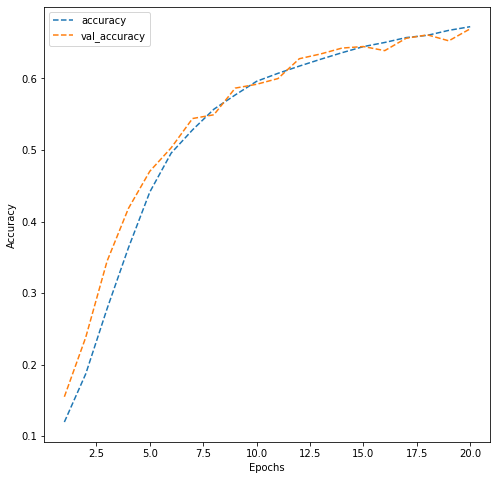

In [ ]:
# plotting the accuracies
dict_hist = history_model_1.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations:**
- Model 1 has an accuracy score of 0.67.
- Model 1 achieves similar training and validation accuracies. This indicates the model is giving a generalized accuracy.
- From the plot we can see that the accuracy curve starts to remain constant when it nears 20 epochs.


In [ ]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
from tensorflow.keras import losses
from tensorflow.keras import optimizers

def nn_model_2():
    model = Sequential() 
    model.add(Dense(256, activation='relu', input_shape=(1024,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))
    adam = optimizers.Adamax(learning_rate=0.0005)
    
    model.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy'])
    
    return model

In [ ]:
model_2 = nn_model_2()

In [ ]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (BatchN  (None, 32)               1

In [ ]:
history_model_2 = model_2.fit(X_train,y_train,
            epochs=30,
            batch_size=128,
            validation_split=0.2,
            verbose=1)

Epoch 1/30
263/263 [==============================] - 7s 18ms/step - loss: 2.3697 - accuracy: 0.1112 - val_loss: 2.2911 - val_accuracy: 0.1145
Epoch 2/30
263/263 [==============================] - 5s 19ms/step - loss: 2.1370 - accuracy: 0.2124 - val_loss: 2.0385 - val_accuracy: 0.3111
Epoch 3/30
263/263 [==============================] - 4s 15ms/step - loss: 1.8653 - accuracy: 0.3537 - val_loss: 1.7009 - val_accuracy: 0.4460
Epoch 4/30
263/263 [==============================] - 3s 10ms/step - loss: 1.6592 - accuracy: 0.4476 - val_loss: 1.5183 - val_accuracy: 0.5131
Epoch 5/30
263/263 [==============================] - 2s 9ms/step - loss: 1.5001 - accuracy: 0.5105 - val_loss: 1.3536 - val_accuracy: 0.5696
Epoch 6/30
263/263 [==============================] - 2s 9ms/step - loss: 1.3796 - accuracy: 0.5549 - val_loss: 1.2239 - val_accuracy: 0.6219
Epoch 7/30
263/263 [==============================] - 2s 9ms/step - loss: 1.2782 - accuracy: 0.5899 - val_loss: 1.1892 - val_accuracy: 0.6117
Ep

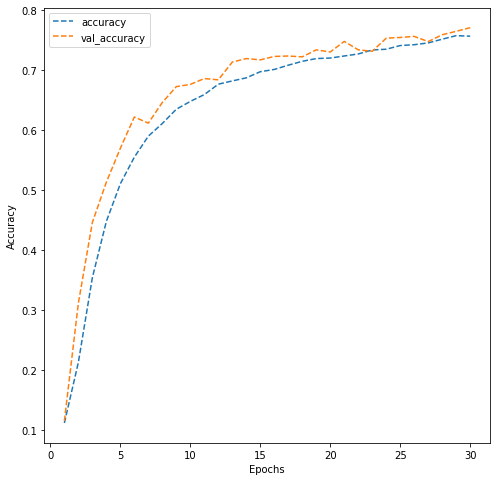

In [ ]:
dict_hist = history_model_2.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations:**
- Model 2 achieves an accuracy of 0.7568.
- We can say that after tuning the hyperparameters and adding more layers, the performance of the model has improved from the previous model.
- This model also gives a generalized performance.

In [ ]:
test_pred = model_2.predict(X_test)
test_pred = np.argmax(test_pred, axis=-1)

In [ ]:
#Converting each entry to single label from one-hot encoded vector
y_test = np.argmax(y_test, axis=-1)

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1814
           1       0.70      0.84      0.76      1828
           2       0.81      0.78      0.79      1803
           3       0.72      0.72      0.72      1719
           4       0.76      0.83      0.79      1812
           5       0.74      0.74      0.74      1768
           6       0.82      0.75      0.78      1832
           7       0.79      0.80      0.80      1808
           8       0.75      0.72      0.74      1812
           9       0.76      0.75      0.75      1804

    accuracy                           0.77     18000
   macro avg       0.77      0.77      0.77     18000
weighted avg       0.77      0.77      0.77     18000



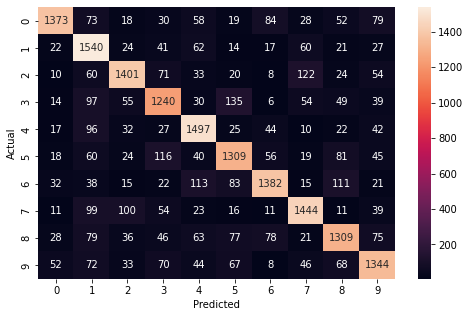

In [ ]:
#importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Printing the classification report
print(classification_report(y_test, test_pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred) #Write the code for creating confusion matrix using actual labels and predicted labels

plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### **Observations:**
- The test accuracy achieved by the model is similar to the training and validation accuracy.
- Model 2's performance is generalized.
- The recall scores for 3 and 8 are the least, this indicates many false negatives for 3 and 8.
- From the heatmap it is observed that the pairs (5,3) and (7,2) are highly correlated. 
- Overall model 2's performance is better than model 1.